# Homework 19 Correlation and regression

## 1 Задача
Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


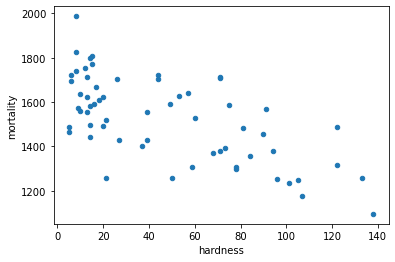

In [3]:
# Строим график
# Уже можно сделать вывод, что связь есть, похожа на обратную линейную зависимость

water.plot(kind='scatter', x='hardness', y='mortality')

In [4]:
# Коэффициенты корреляции
print('Kendall\n', water[['hardness', 'mortality']].corr(method='kendall'), '\n\n')
print('Spearman\n', water[['hardness', 'mortality']].corr(method='spearman'))

Kendall
            hardness  mortality
hardness   1.000000  -0.453753
mortality -0.453753   1.000000 


Spearman
            hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [5]:
# Делим выборку на обучающую и тестовую, строим модель и обучаем ее
X = water[['hardness']]
y = water['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_, model.intercept_, sep='\n')

[-3.48394483]
1697.9468341725342


In [6]:
# Применяем модель к тестовой выборке
y_pred = model.predict(X_test)
y_pred

array([1513.29775814, 1426.19913737, 1346.06840626, 1272.90556482,
       1666.5913307 , 1656.1394962 , 1603.88032374, 1624.78399273,
       1450.58675119, 1272.90556482, 1426.19913737, 1649.17160654,
       1645.68766171, 1680.52711002, 1607.36426857, 1652.65555137])

In [7]:
# Посмотрим на коэффициенты детерминации
print('test', model.score(X_test, y_test))
print('train', model.score(X_train, y_train))

test 0.329569647926119
train 0.43991822173874084


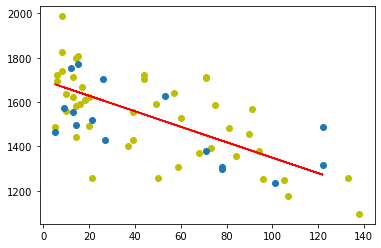

In [8]:
# Отобразим тестовую и обучающую выборки, а также линию регрессии 
plt.scatter(X_train, y_train, c='y')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Оценим распределение остатков; создадим датафрейм из исходных данных и добавим столбцы с предсказанными значениями и
# остатком

prediction = model.predict(X)

rests = pd.concat([X,y,pd.Series(prediction).rename('predict')], axis=1)
rests['rest'] = rests.mortality - rests.predict
rests

In [ ]:
# Scatter остатков; выглядит довольно хаотично => регрессия удалась :)
rests.plot(kind='scatter', x='hardness', y='rest')

In [ ]:
# Взглянем на распределение остатков; в целом, походит на нормальное, отсутствие ярко выраженного пика можно оправдать
# неидеальностью исходных данных

rests.rest.plot.hist()


## 2 Задание
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
water
north = water.loc[water.location == 'North']
south = water.loc[water.location == 'South']

south.location.size + north.location.size # 61 OK

In [ ]:
# По точечным графикам можно заметить, что обратная связь смертности от жесткости сохраняется для обоих регионов,
# однако для северного региона она выражена не столь явно, сколь для южного
north.plot(kind='scatter', x='hardness', y='mortality')
south.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# Коэффициенты корреляции подверждают сделанные выше наблюдения
print('NORTH')
print('Kendall\n', north[['hardness', 'mortality']].corr(method='kendall'), '\n')
print('Spearman\n', north[['hardness', 'mortality']].corr(method='spearman'))

print('\n\n\nSOUTH')
print('Kendall\n', south[['hardness', 'mortality']].corr(method='kendall'), '\n')
print('Spearman\n', south[['hardness', 'mortality']].corr(method='spearman'))

In [ ]:
# Делим выборки на обучающую и тестовую, строим модели и обучаем их
Xn = north[['hardness']]
yn = north['mortality']

Xs = south[['hardness']]
ys = south['mortality']

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.25, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.25, random_state=42)

model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)

model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)

print('North', model_n.coef_, model_n.intercept_)
print('South', model_s.coef_, model_s.intercept_)

# Видно, что коэффициент линейной зависимости для юга превосходит таковой для севера по абсолютной величине
# При этом константы практически одинаковые, что, вероятно, говорит об одинаковом уровне цен на севере и юге

In [ ]:
# Применяем модели к тестовым выборкам
yn_pred = model_n.predict(Xn_test)
ys_pred = model_s.predict(Xs_test)

# Коэффициенты детерминации
print('North')
print('test', model_n.score(Xn_test, yn_test))
print('train', model_n.score(Xn_train, yn_train))
print('South')
print('test', model_s.score(Xs_test, ys_test))
print('train', model_s.score(Xs_train, ys_train))

# Отобразим тестовую и обучающую выборки, а также линию регрессии 
plt.scatter(Xn_train, yn_train, c='y')
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')
plt.show()

plt.scatter(Xs_train, ys_train, c='y')
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')
plt.show()

# Намеренно оставил параметр random_state=42 выше; при таком значении тестовая выборка для юга совершенно не согласуется
# с регрессией, что можно видеть как на визуализации, так и по коэффициенту детерминации (>1 по модулю)
# При этом, если поиграться со значением random_state, то на ряде тестовых выборок регрессия показывает 
# хороший результата, например, при random_state=0